In [6]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
Eng18 = pd.read_excel('C:/Users/trent/OneDrive/Documents/Repositories/Pythagorean_Expectations_Predictions/data/Engsoccer2017-18.xlsx')
print(Eng18.columns.tolist())

['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']


In [8]:
Eng18

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,EPL,2017-11-08 00:00:00,Arsenal,Leicester,4,3,H
1,EPL,2017-12-08 00:00:00,Brighton,Man City,0,2,A
2,EPL,2017-12-08 00:00:00,Chelsea,Burnley,2,3,A
3,EPL,2017-12-08 00:00:00,Crystal Palace,Huddersfield,0,3,A
4,EPL,2017-12-08 00:00:00,Everton,Stoke,1,0,H
...,...,...,...,...,...,...,...
2031,FL2,2018-05-05 00:00:00,Lincoln,Yeovil,1,1,D
2032,FL2,2018-05-05 00:00:00,Mansfield,Crawley Town,1,1,D
2033,FL2,2018-05-05 00:00:00,Notts County,Luton,0,0,D
2034,FL2,2018-05-05 00:00:00,Swindon,Accrington,3,0,H


In [9]:
Eng18['hwinvalue']=np.where(Eng18['FTR']=='H',1,np.where(Eng18['FTR']=='D',.5,0))
Eng18['awinvalue']=np.where(Eng18['FTR']=='A',1,np.where(Eng18['FTR']=='D',.5,0))
Eng18['count']=1

In [10]:
Enghome = Eng18.groupby(['HomeTeam','Div'])[['count','hwinvalue', 'FTHG','FTAG']].sum().reset_index()
Enghome = Enghome.rename(columns={'HomeTeam':'team','count':'Ph','FTHG':'FTHGh','FTAG':'FTAGh'})
Enghome

,team,Div,Ph,hwinvalue,FTHGh,FTAGh
0,AFC Wimbledon,FL1,23,11.0,25,30
1,Accrington,FL2,23,18.5,42,19
2,Arsenal,EPL,19,16.0,54,20
3,Aston Villa,FLCH,23,17.5,42,19
4,Barnet,FL2,23,11.0,24,25
...,...,...,...,...,...,...
87,West Ham,EPL,19,10.0,24,26
88,Wigan,FL1,23,17.0,37,11
89,Wolves,FLCH,23,18.5,47,18
90,Wycombe,FL2,23,14.5,43,35


In [11]:
Engaway = Eng18.groupby('AwayTeam')[['count','awinvalue', 'FTHG','FTAG']].sum().reset_index()
Engaway = Engaway.rename(columns={'AwayTeam':'team','count':'Pa','FTHG':'FTHGa','FTAG':'FTAGa'})
Engaway

,team,Pa,awinvalue,FTHGa,FTAGa
0,AFC Wimbledon,23,9.0,28,22
1,Accrington,23,13.5,27,34
2,Arsenal,19,6.0,31,20
3,Aston Villa,23,12.0,23,30
4,Barnet,23,6.0,40,22
...,...,...,...,...,...
87,West Ham,19,6.0,42,24
88,Wigan,23,17.5,18,52
89,Wolves,23,16.0,21,35
90,Wycombe,23,15.5,25,36


In [12]:
Eng18 = pd.merge(Enghome, Engaway, on = ['team'])
Eng18

,team,Div,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa
0,AFC Wimbledon,FL1,23,11.0,25,30,23,9.0,28,22
1,Accrington,FL2,23,18.5,42,19,23,13.5,27,34
2,Arsenal,EPL,19,16.0,54,20,19,6.0,31,20
3,Aston Villa,FLCH,23,17.5,42,19,23,12.0,23,30
4,Barnet,FL2,23,11.0,24,25,23,6.0,40,22
...,...,...,...,...,...,...,...,...,...,...
87,West Ham,EPL,19,10.0,24,26,19,6.0,42,24
88,Wigan,FL1,23,17.0,37,11,23,17.5,18,52
89,Wolves,FLCH,23,18.5,47,18,23,16.0,21,35
90,Wycombe,FL2,23,14.5,43,35,23,15.5,25,36


In [13]:
Eng18['W'] = Eng18['hwinvalue']+Eng18['awinvalue']
Eng18['G'] = Eng18['Ph']+Eng18['Pa']
Eng18['GF'] = Eng18['FTHGh']+Eng18['FTAGa']
Eng18['GA'] = Eng18['FTAGh']+Eng18['FTHGa']
Eng18

,team,Div,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,G,GF,GA
0,AFC Wimbledon,FL1,23,11.0,25,30,23,9.0,28,22,20.0,46,47,58
1,Accrington,FL2,23,18.5,42,19,23,13.5,27,34,32.0,46,76,46
2,Arsenal,EPL,19,16.0,54,20,19,6.0,31,20,22.0,38,74,51
3,Aston Villa,FLCH,23,17.5,42,19,23,12.0,23,30,29.5,46,72,42
4,Barnet,FL2,23,11.0,24,25,23,6.0,40,22,17.0,46,46,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,West Ham,EPL,19,10.0,24,26,19,6.0,42,24,16.0,38,48,68
88,Wigan,FL1,23,17.0,37,11,23,17.5,18,52,34.5,46,89,29
89,Wolves,FLCH,23,18.5,47,18,23,16.0,21,35,34.5,46,82,39
90,Wycombe,FL2,23,14.5,43,35,23,15.5,25,36,30.0,46,79,60


In [14]:
Eng18['wpc'] = Eng18['W']/Eng18['G']
Eng18['pyth'] = Eng18['GF']**2/(Eng18['GF']**2 + Eng18['GA']**2)
Eng18

,team,Div,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,G,GF,GA,wpc,pyth
0,AFC Wimbledon,FL1,23,11.0,25,30,23,9.0,28,22,20.0,46,47,58,0.434783,0.396375
1,Accrington,FL2,23,18.5,42,19,23,13.5,27,34,32.0,46,76,46,0.695652,0.731880
2,Arsenal,EPL,19,16.0,54,20,19,6.0,31,20,22.0,38,74,51,0.578947,0.677974
3,Aston Villa,FLCH,23,17.5,42,19,23,12.0,23,30,29.5,46,72,42,0.641304,0.746114
4,Barnet,FL2,23,11.0,24,25,23,6.0,40,22,17.0,46,46,65,0.369565,0.333701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,West Ham,EPL,19,10.0,24,26,19,6.0,42,24,16.0,38,48,68,0.421053,0.332564
88,Wigan,FL1,23,17.0,37,11,23,17.5,18,52,34.5,46,89,29,0.750000,0.904017
89,Wolves,FLCH,23,18.5,47,18,23,16.0,21,35,34.5,46,82,39,0.750000,0.815525
90,Wycombe,FL2,23,14.5,43,35,23,15.5,25,36,30.0,46,79,60,0.652174,0.634184


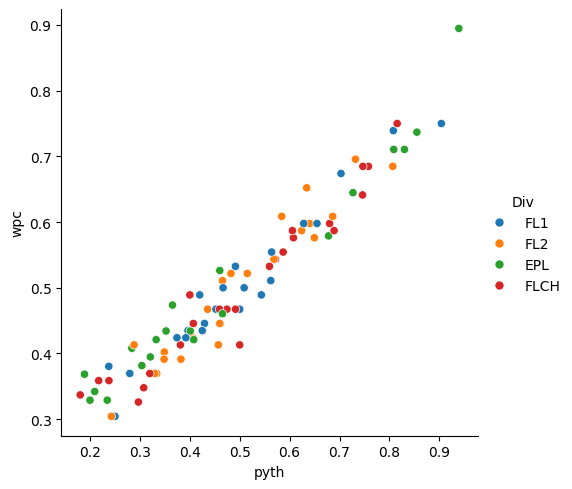

In [15]:
sns.relplot(x="pyth", y="wpc", data =Eng18,hue='Div')

In [16]:
pyth_lm = smf.ols(formula = 'wpc ~ pyth', data=Eng18).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     1265.
Date:                Fri, 25 Jul 2025   Prob (F-statistic):           8.87e-55
Time:                        20:58:21   Log-Likelihood:                 187.39
No. Observations:                  92   AIC:                            -370.8
Df Residuals:                      90   BIC:                            -365.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1803      0.010     18.804      0.000       0.161       0.199
pyth           0.6502      0.018     35.561      0.000       0.614       0.687
==============================================================================
Omnibus:                        3.561   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.169   Jarque-Bera (JB):                2.898
Skew:                           0.327   Prob(JB):                        0.235
Kurtosis:                       3.574   Cond. No.                         6.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""